# Classification (MLP)

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
with np.load('data/mnist_fashion.npz') as data:
    X = data['x_train']
    Y = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

---

split into validation

In [3]:
x_valid, x_train = X[:5000]/255.0 , X[5000:]/255.0
y_valid, y_train = Y[:5000] , Y[5000:]

In [5]:
x_valid.shape, x_train.shape

((5000, 28, 28), (55000, 28, 28))

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

---

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# from tensorflow.keras.utils import plot_model
# plot_model(model)

In [11]:
model.layers

In [13]:
hidden1 = model.layers[1]

In [14]:
weights, biases = hidden1.get_weights()

In [15]:
weights, biases

(array([[-0.06775083,  0.00732357, -0.06839938, ..., -0.02519577,
          0.06660795,  0.02657106],
        [ 0.0170395 , -0.01506779, -0.05742882, ...,  0.06269816,
          0.02044947, -0.00349396],
        [-0.0743892 ,  0.01395481,  0.02086151, ..., -0.03174413,
          0.02649432, -0.00734895],
        ...,
        [-0.07268283,  0.00911914,  0.07435559, ..., -0.03055727,
          0.03595506,  0.00450066],
        [ 0.05180532, -0.04218078, -0.05770289, ..., -0.06788859,
          0.02478909, -0.04731768],
        [-0.0195814 , -0.04614698, -0.00844614, ...,  0.03047112,
          0.06613904, -0.03331549]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [17]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5925 - accuracy: 0.8469 - val_loss: 0.3013 - val_accuracy: 0.9156
Epoch 2/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2876 - accuracy: 0.9170 - val_loss: 0.2396 - val_accuracy: 0.9296
Epoch 3/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.2363 - accuracy: 0.9323 - val_loss: 0.2065 - val_accuracy: 0.9422
Epoch 4/30
55000/55000 [==============================] - 4s 82us/sample - loss: 0.2015 - accuracy: 0.9426 - val_loss: 0.1803 - val_accuracy: 0.9486
Epoch 5/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.1759 - accuracy: 0.9497 - val_loss: 0.1604 - val_accuracy: 0.9540
Epoch 6/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.1555 - accuracy: 0.9556 - val_loss: 0.1443 - val_accuracy: 0.9586
Epoch 7/30
55000/55000 [==============================] -

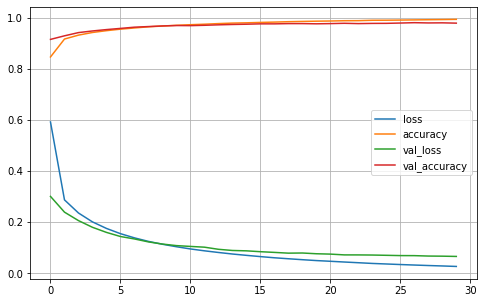

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [23]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 12.7360 - accuracy: 0.9752


[12.735998806811027, 0.9752]

In [46]:
model.predict(x_test[:1])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [45]:
 y_test[:1]

array([7], dtype=uint8)

---

# Regression (MLP)

## Having problems with regression --> Try this link https://www.tensorflow.org/tutorials/keras/regression

In [163]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras

In [150]:
df = pd.read_csv("data/housing.csv")
df.dropna(inplace=True)

In [151]:
X = df.drop(['median_house_value','ocean_proximity'], axis=1)
Y = df[['median_house_value']]

In [164]:
std_scaler = MinMaxScaler()
X, Y = std_scaler.fit_transform(X), std_scaler.fit_transform(Y)

In [165]:
_, x_test = train_test_split(X, test_size=.2)
x_train, x_valid = train_test_split(_, test_size=.2)

_, y_test = train_test_split(Y, test_size=.2)
y_train, y_valid = train_test_split(_, test_size=.2)

In [168]:
model = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=x_train.shape[1:]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [169]:
model.fit(x_train, y_train, epochs=20, validation_data = (x_valid, y_valid))

Train on 13076 samples, validate on 3270 samples
Epoch 1/20
13076/13076 [==============================] - 1s 59us/sample - loss: 0.0634 - val_loss: 0.0580
Epoch 2/20
13076/13076 [==============================] - 1s 48us/sample - loss: 0.0577 - val_loss: 0.0577
Epoch 3/20
13076/13076 [==============================] - 1s 54us/sample - loss: 0.0576 - val_loss: 0.0577
Epoch 4/20
13076/13076 [==============================] - 1s 49us/sample - loss: 0.0574 - val_loss: 0.0573
Epoch 5/20
13076/13076 [==============================] - 1s 52us/sample - loss: 0.0573 - val_loss: 0.0572
Epoch 6/20
13076/13076 [==============================] - 1s 44us/sample - loss: 0.0573 - val_loss: 0.0574
Epoch 7/20
13076/13076 [==============================] - 1s 40us/sample - loss: 0.0572 - val_loss: 0.0573
Epoch 8/20
13076/13076 [==============================] - 1s 41us/sample - loss: 0.0572 - val_loss: 0.0571
Epoch 9/20
13076/13076 [==============================] - 1s 41us/sample - loss: 0.0571 - val_l

In [72]:
mse_test = model.evaluate(x_test, y_test)

4087/4087 [==============================] - 0s 21us/sample - loss: 0.9953


In [74]:
X_new = x_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[-0.06707814],
       [ 0.05825517],
       [-0.02682506]], dtype=float32)

-------------

In [109]:
import pandas as pd

x1 = np.arange(0,200,2)
x2 = np.arange(10,210,2)

delta = np.random.uniform(-8,8, size=(100,))
x = np.array([x1, x2])
data = {'col1': x1, 'col2': x2, 'col3' : (.4 * x1 + 3 * x2 + delta) }

In [111]:
df = pd.DataFrame(data)
df

,col1,col2,col3
0,0,10,34.913817
1,2,12,34.806199
2,4,14,39.316351
3,6,16,51.829975
4,8,18,60.022647
...,...,...,...
95,190,200,680.260874
96,192,202,676.825437
97,194,204,684.751788
98,196,206,691.270050


In [127]:
x_valid = df.iloc[:10,:2].to_numpy()
x_train = df.iloc[10:,:2].to_numpy()
y_valid = df.iloc[:10,2].to_numpy()
y_train = df.iloc[10:,2].to_numpy()

In [148]:
model = keras.models.Sequential([
    keras.layers.Dense(2, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(x_train, y_train, epochs=3, validation_data = (x_valid, y_valid))

Train on 90 samples, validate on 10 samples
Epoch 1/3
90/90 [==============================] - 0s 4ms/sample - loss: 185265.8392 - val_loss: 1768.1051
Epoch 2/3
90/90 [==============================] - 0s 156us/sample - loss: 167621.6295 - val_loss: 608.0238
Epoch 3/3
90/90 [==============================] - 0s 143us/sample - loss: 151851.0733 - val_loss: 432.4919


---

# Very very simple regression running fine now

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
df = pd.DataFrame({'col1': np.arange(1,10,.1), 'col2': np.arange(21,30,.1)})

In [72]:
x = df['col1'].to_numpy()
y = df['col2'].to_numpy()

x = StandardScaler().fit_transform(x.reshape(-1,1))
y = StandardScaler().fit_transform(y.reshape(-1,1))

In [73]:
x_train, x_valid = x[10:], x[:10]
y_train, y_valid = y[10:], y[:10]

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(1, activation="linear"),
    keras.layers.Dense(1)
])
optimizer = tf.optimizers.SGD(lr=.01)
model.compile(loss="mean_squared_error", optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=100, validation_data = (x_valid, y_valid))

Train on 80 samples, validate on 10 samples
Epoch 1/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.3670 - val_loss: 0.8568
Epoch 2/100
80/80 [==============================] - 0s 163us/sample - loss: 0.2691 - val_loss: 0.6517
Epoch 3/100
80/80 [==============================] - 0s 188us/sample - loss: 0.2001 - val_loss: 0.4923
Epoch 4/100
80/80 [==============================] - 0s 213us/sample - loss: 0.1476 - val_loss: 0.3688
Epoch 5/100
80/80 [==============================] - 0s 198us/sample - loss: 0.1075 - val_loss: 0.2777
Epoch 6/100
80/80 [==============================] - 0s 213us/sample - loss: 0.0782 - val_loss: 0.2070
Epoch 7/100
80/80 [==============================] - 0s 163us/sample - loss: 0.0564 - val_loss: 0.1549
Epoch 8/100
80/80 [==============================] - 0s 201us/sample - loss: 0.0409 - val_loss: 0.1165
Epoch 9/100
80/80 [==============================] - 0s 201us/sample - loss: 0.0297 - val_loss: 0.0869
Epoch 10/100
80/80 [===========

In [78]:
x[10], y[10]

(array([-1.3279876]), array([-1.3279876]))

In [79]:
model.predict(np.array([-1.33]))

array([[-1.3299378]], dtype=float32)

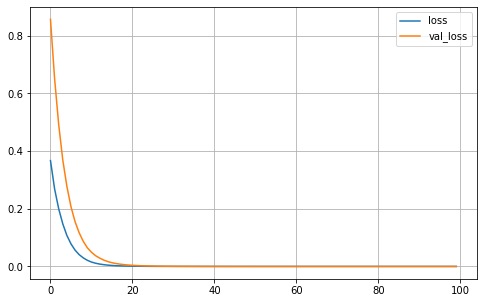

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)